# Executive Summary

This project concerns the use of web-scraped data and natural language processing to build a recommendation engine for the texts of Charles Dickens. More specifically, the model will consider which book is recommended for a user who has read Charles Dickens' historical novel A Tale of Two Cities.

The keys steps taken in the project are:

1. Sourcing of the relevant texts
2. Pre-processing of the texts
3. Analysis & comparison of the texts (including assessment of the content)

These stages will allow the building of the basis of a recommendation engine which outputs the texts which are 'similar' to A Tale of Two Cities.

# 1. Procurement of Texts

The first step in the process is getting the text for each of the books we are analysing. The texts are source from the Project Gutenberg website (an online library of over 60,000 free eBooks)

To do this the following steps are taken, for each book:
    
- Using the requests library, and the get method, with the url for the page with the HTML of the book as an input, the HTML of each book is procured
- The correct text encoding is then specified
- Using .tex the HTML is extracted from the object
    
This step is repeated for each book being analysed.

In [8]:
pip install -U gensim

Requirement already up-to-date: gensim in /opt/anaconda3/lib/python3.7/site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [88]:
# Firstly, import and install all the relevant packages
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import re
import pickle

from nltk.stem import WordNetLemmatizer
from gensim import corpora

import pandas as pd

from gensim.models import TfidfModel
from gensim import similarities
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [11]:
# Getting the Tale of Two Cities HTML 
r_totc = requests.get('https://www.gutenberg.org/files/98/98-h/98-h.htm')

# Setting the correct text encoding of the HTML page
r_totc.encoding = 'utf-8'

# Extracting the HTML from the request object
html_totc = r_totc.text



# Getting the Christmas Carol HTML 
r_cc = requests.get('https://www.gutenberg.org/files/46/46-h/46-h.htm')

# Setting the correct text encoding of the HTML page
r_cc.encoding = 'utf-8'

# Extracting the HTML from the request object
html_cc = r_cc.text



# Getting the David Copperfield HTML 
r_dc = requests.get('https://www.gutenberg.org/files/766/766-h/766-h.htm')

# Setting the correct text encoding of the HTML page
r_dc.encoding = 'utf-8'

# Extracting the HTML from the request object
html_dc = r_dc.text



# Getting the Pickwick Papers HTML 
r_pp = requests.get('https://www.gutenberg.org/files/580/580-h/580-h.htm')

# Setting the correct text encoding of the HTML page
r_pp.encoding = 'utf-8'

# Extracting the HTML from the request object
html_pp = r_pp.text



# Getting the Oliver Twist HTML 
r_ot = requests.get('https://www.gutenberg.org/ebooks/730')

# Setting the correct text encoding of the HTML page
r_ot.encoding = 'utf-8'

# Extracting the HTML from the request object
html_ot = r_ot.text



# Getting the Nicholas Nickleby HTML 
r_nn = requests.get('https://www.gutenberg.org/files/967/967-h/967-h.htm')

# Setting the correct text encoding of the HTML page
r_nn.encoding = 'utf-8'

# Extracting the HTML from the request object
html_nn = r_nn.text



# Getting the The Old Curiosity Shop HTML 
r_ocs = requests.get('https://www.gutenberg.org/files/700/700-h/700-h.htm')

# Setting the correct text encoding of the HTML page
r_ocs.encoding = 'utf-8'

# Extracting the HTML from the request object
html_ocs = r_ocs.text



# Getting the Barnaby Rudge HTML 
r_br = requests.get('https://www.gutenberg.org/files/917/917-h/917-h.htm')

# Setting the correct text encoding of the HTML page
r_br.encoding = 'utf-8'

# Extracting the HTML from the request object
html_br = r_br.text




# Getting the Martin Chuzzlewit HTML 
r_mc = requests.get('https://www.gutenberg.org/files/968/968-h/968-h.htm')

# Setting the correct text encoding of the HTML page
r_mc.encoding = 'utf-8'

# Extracting the HTML from the request object
html_mc = r_mc.text



# Getting the The Chimes HTML 
r_tc = requests.get('https://www.gutenberg.org/files/653/653-h/653-h.htm')

# Setting the correct text encoding of the HTML page
r_tc.encoding = 'utf-8'

# Extracting the HTML from the request object
html_tc = r_tc.text



# Getting the The Cricket on the Hearth HTML 
r_toth = requests.get('https://www.gutenberg.org/files/678/678-h/678-h.htm')

# Setting the correct text encoding of the HTML page
r_toth.encoding = 'utf-8'

# Extracting the HTML from the request object
html_toth = r_toth.text



# Getting the Dombey and Son HTML 
r_ds = requests.get('https://www.gutenberg.org/files/821/821-h/821-h.htm')

# Setting the correct text encoding of the HTML page
r_ds.encoding = 'utf-8'

# Extracting the HTML from the request object
html_ds = r_ds.text



# Getting the The Haunted Man HTML 
r_hm = requests.get('https://www.gutenberg.org/files/644/644-h/644-h.htm')

# Setting the correct text encoding of the HTML page
r_hm.encoding = 'utf-8'

# Extracting the HTML from the request object
html_hm = r_hm.text



# Getting the Bleak House HTML 
r_bh = requests.get('https://www.gutenberg.org/files/1023/1023-h/1023-h.htm')

# Setting the correct text encoding of the HTML page
r_bh.encoding = 'utf-8'

# Extracting the HTML from the request object
html_bh = r_bh.text




# Getting the Hard Times HTML 
r_ht = requests.get('https://www.gutenberg.org/files/786/786-h/786-h.htm')

# Setting the correct text encoding of the HTML page
r_ht.encoding = 'utf-8'

# Extracting the HTML from the request object
html_ht = r_ht.text



# Getting the Little Dorrit HTML 
r_ld = requests.get('https://www.gutenberg.org/files/963/963-h/963-h.htm')

# Setting the correct text encoding of the HTML page
r_ld.encoding = 'utf-8'

# Extracting the HTML from the request object
html_ld = r_ld.text



# Getting the Great Expectations HTML 
r_ge = requests.get('https://www.gutenberg.org/files/1400/1400-h/1400-h.htm')

# Setting the correct text encoding of the HTML page
r_ge.encoding = 'utf-8'

# Extracting the HTML from the request object
html_ge = r_ge.text



# Getting the Our Mutual Friend HTML 
r_omf = requests.get('https://www.gutenberg.org/files/883/883-h/883-h.htm')

# Setting the correct text encoding of the HTML page
r_omf.encoding = 'utf-8'

# Extracting the HTML from the request object
html_omf = r_omf.text



# Getting the Mystery of Edwin Drood HTML 
r_ed = requests.get('https://www.gutenberg.org/files/564/564-h/564-h.htm')

# Setting the correct text encoding of the HTML page
r_ed.encoding = 'utf-8'

# Extracting the HTML from the request object
html_ed = r_ed.text

The Beautiful Soup library is used to extract the text of each book from the relevant HTML file. For each book, this is done for each book by creating a Beautiful Soup object then extracting the text. A regular expression is then used to remove any non-alphanumeric characters from the extracted text.
    

In [46]:
# Creating a BeautifulSoup object from the HTML of A Tale of Two Cities
soup_totc = BeautifulSoup(html_totc)

# Extract the text of A Tale of Two Cities
text_totc = soup_totc.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]') # Define the regular expression to remove the non-alpha-numeric characters (this same regular expression will be used for all books)
text_totc_alphanum = regex_non_alphanum.sub(' ', text_totc)



# Creating a BeautifulSoup object from the HTML of A Christmas Carol
soup_cc = BeautifulSoup(html_cc)

# Extract the text of A Christmas Carol
text_cc = soup_cc.text

#Remove all non-alpha-numeric characters
text_cc_alphanum = regex_non_alphanum.sub(' ', text_cc)



# Creating a BeautifulSoup object from the HTML of David Copperfield
soup_dc = BeautifulSoup(html_dc)

# Extract the text of David Copperfield
text_dc = soup_dc.text

#Remove all non-alpha-numeric characters
text_dc_alphanum = regex_non_alphanum.sub(' ', text_dc)



# Creating a BeautifulSoup object from the HTML from The Pickwick Papers
soup_pp = BeautifulSoup(html_pp)

# Extract the text of The Pickwick Papers
text_pp = soup_pp.text

#Remove all non-alpha-numeric characters
text_pp_alphanum = regex_non_alphanum.sub(' ', text_pp)


# Creating a BeautifulSoup object from the HTML of Oliver Twist
soup_ot = BeautifulSoup(html_ot)

# Extract the text of Oliver Twist
text_ot = soup_ot.text

#Remove all non-alpha-numeric characters
text_ot_alphanum = regex_non_alphanum.sub(' ', text_ot)



# Creating a BeautifulSoup object from the HTML of Nicholas Nickleby
soup_nn = BeautifulSoup(html_nn)

# Extract the text of Nicholas Nickleby
text_nn = soup_nn.text

#Remove all non-alpha-numeric characters
text_nn_alphanum = regex_non_alphanum.sub(' ', text_nn)



# Creating a BeautifulSoup object from the HTML of The Old Curiousity Shop
soup_ocs = BeautifulSoup(html_ocs)

# Extract the text of Nicholas Nickleby
text_ocs = soup_ocs.text

#Remove all non-alpha-numeric characters
text_ocs_alphanum = regex_non_alphanum.sub(' ', text_ocs)


# Creating a BeautifulSoup object from the HTML
soup_br = BeautifulSoup(html_br)

# Getting the text out of the soup
text_br = soup_br.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_br_alphanum = regex_non_alphanum.sub(' ', text_br)



# Creating a BeautifulSoup object from the HTML
soup_mc = BeautifulSoup(html_mc)

# Getting the text out of the soup
text_mc = soup_mc.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_mc_alphanum = regex_non_alphanum.sub(' ', text_mc)



# Creating a BeautifulSoup object from the HTML
soup_tc = BeautifulSoup(html_tc)

# Getting the text out of the soup
text_tc = soup_tc.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_tc_alphanum = regex_non_alphanum.sub(' ', text_tc)



# Creating a BeautifulSoup object from the HTML
soup_toth = BeautifulSoup(html_toth)

# Getting the text out of the soup
text_toth = soup_toth.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_toth_alphanum = regex_non_alphanum.sub(' ', text_toth)



# Creating a BeautifulSoup object from the HTML
soup_ds = BeautifulSoup(html_ds)

# Getting the text out of the soup
text_ds = soup_ds.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_ds_alphanum = regex_non_alphanum.sub(' ', text_ds)



# Creating a BeautifulSoup object from the HTML
soup_hm = BeautifulSoup(html_hm)

# Getting the text out of the soup
text_hm = soup_hm.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_hm_alphanum = regex_non_alphanum.sub(' ', text_hm)



# Creating a BeautifulSoup object from the HTML
soup_bh = BeautifulSoup(html_bh)

# Getting the text out of the soup
text_bh = soup_bh.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_bh_alphanum = regex_non_alphanum.sub(' ', text_bh)



# Creating a BeautifulSoup object from the HTML
soup_ht = BeautifulSoup(html_ht)

# Getting the text out of the soup
text_ht = soup_ht.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_ht_alphanum = regex_non_alphanum.sub(' ', text_ht)





# Creating a BeautifulSoup object from the HTML
soup_ld = BeautifulSoup(html_ld)

# Getting the text out of the soup
text_ld = soup_ld.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_ld_alphanum = regex_non_alphanum.sub(' ', text_ld)




# Creating a BeautifulSoup object from the HTML
soup_ge = BeautifulSoup(html_ge)

# Getting the text out of the soup
text_ge = soup_ge.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_ge_alphanum = regex_non_alphanum.sub(' ', text_ge)



# Creating a BeautifulSoup object from the HTML
soup_omf = BeautifulSoup(html_omf)

# Getting the text out of the soup
text_omf = soup_omf.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_omf_alphanum = regex_non_alphanum.sub(' ', text_omf)



# Creating a BeautifulSoup object from the HTML
soup_ed = BeautifulSoup(html_ed)

# Getting the text out of the soup
text_ed = soup_ed.text

#Remove all non-alpha-numeric characters
regex_non_alphanum = re.compile('[^a-zA-Z]')
text_ed_alphanum = regex_non_alphanum.sub(' ', text_ed)

All of the individual texts of the books are put into a single list of strings (with each string representing the text of a book).

In [47]:
# Instantiate an empty list
txts = []

# Append the texts of all of the books to the list
txts.append(text_totc_alphanum)
txts.append(text_cc_alphanum)
txts.append(text_dc_alphanum)
txts.append(text_pp_alphanum)
txts.append(text_ot_alphanum)
txts.append(text_nn_alphanum)
txts.append(text_ocs_alphanum)
txts.append(text_br_alphanum)
txts.append(text_mc_alphanum)
txts.append(text_tc_alphanum)
txts.append(text_toth_alphanum)
txts.append(text_ds_alphanum)
txts.append(text_hm_alphanum)
txts.append(text_bh_alphanum)
txts.append(text_ht_alphanum)
txts.append(text_ld_alphanum)
txts.append(text_ge_alphanum)
txts.append(text_omf_alphanum)
txts.append(text_ed_alphanum)

To assist in the indexing of all the books, a list of titles for all the books is defined. This list is then use to define the relevant index of A Tale of Two Cities (the book for which we are assessing the similarity of other books).

In [48]:
# Define the list of titles of the books
titles = ["ataleoftwocities", "achristmascarol", "davidcopperfield", "pickwickpapers", "olivertwist", "nicholasnickleby", "theoldcuriosityshop", "barnabyrudge", "martinchuzzlewit", "thechimes", "thecricketonthehearth", "dombeyandson", "thehauntedman", "bleakhouse", "hardtimes", "littledorrit", "greatexpectations", "ourmutualfriend", "edwindrood"]

# Browse the list containing all the titles and define the index for A Tale of Two Cities
for i in range(len(titles)):
    # Store the index if the title is "ataleoftwocities"
    if titles[i] == 'ataleoftwocities':
        totc = i

# 2. Pre-Processing of Texts

At this point we have sourced the relevant texts. Now we move onto processing of the texts ready for comparison.

Firstly, the texts are converted to lower case. Then, in a process known as tokenization, the texts are split into tokens (i.e. individual words) so that the words which make up the different texts may be compared.

Following this, a list of stop_words are defined. These are common words (such as 'and', 'the') that may be removed in order that the content of the text is more precisely analysed.

This whole process is conducted on the file containing all the texts.

In [49]:
# Convert the text to lower case 
txts_lower_case = [txt.lower() for txt in txts]

# Transform the text into tokens 
txts_split = [txt.split() for txt in txts_lower_case]

# Getting the English stop words from nltk
stoplist = set(nltk.corpus.stopwords.words('english'))

# Remove tokens which are part of the list of stop words
texts = [[token for token in txt if token not in stoplist] for txt in txts_split]

The next step in the processing of the text is to lemmatise the words. This is the process by which different words with the same route are reduced to a single form. For example, the words "transforming", "transformed", "transform" would all be reduced to "transform".

This step is completed using the WordNetLemmatizer from the nltk package in Python.

In [50]:
#Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

#Define the lemmatization function
def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in text]

#Apply the lemmatizer to texts
texts_lemma = list(map(lemmatize_text, texts))

In order to simply represent the words used in each of the books, we create a Bag-of-words (BOW) model. This uses a unique token for each word, and also states the number of occurences of that word, for each of the texts.

The first step in the creation of the BOW model is creating a dictionary which includes all of the words (post the previous processing) contained within the series of texts. This is done using the Dictionary function of the corpora library.

Then, using the doc2bow function the BOW model is created for each text. All of the models are contained in a single variable 'bows'.

In [51]:
#Create a dictionary from the lemmatized tokens
dictionary = corpora.Dictionary(texts_lemma)

#For each book, using the previously generated dictionary, create a bag of words model
bows = [dictionary.doc2bow(text) for text in texts_lemma]

At this stage it is potentially interesting to see some of the more common words from the key book of interest; A Tale of Two Cities.

This is done below.

In [114]:
# Convert the BOW model for on Tale of Two Cities into a DataFrame
df_bow_totc = pd.DataFrame(bows[totc])

# Define the column names of the DataFrame and add a column of the token, which corresponds to the dictionary index 
df_bow_totc.columns = ['index', 'occurences']
df_bow_totc['token'] = [dictionary[index] for index in df_bow_totc['index']]

# Prin the 20 most common words from A Tale of Two Cities
df_bow_totc.sort_values(by='occurences', ascending=False).head(10)

,index,occurences,token
6669,6669,661,said
5032,5032,640,mr
5308,5308,444,one
4660,4660,369,lorry
3624,3624,364,hand
8772,8772,343,would
7920,7920,318,time
1947,1947,302,defarge
4744,4744,300,man
8352,8352,291,upon


It should be noted that the above does not include the stop words which have previously been removed from the texts.

# 3. Analysis and comparison of texts

The aim of the analysis is to check how similar the various books are. Rather than simply checking what the common words are in each book and comparing these, instead the importance of words in each book are evaluated and compared across the books to assess the similarity of the text.

An 'important' word in a book is one which appears many times in the book but comparatively few times in other books. To more formally assess this we look at term frequency-inverse document frequency ("tf-idf"):
    
 - Term frequency measures how often a word appears in a document
 - Inverse document freqyency measures the important of a word but assessing how many of the set of documents include that word
 
The TfidfModel from the Gensim package is used to create this model for the texts.

In [53]:
# Generate the tfidf model
tfidf_model = TfidfModel(bows)

The tdidf model for A Tale of Two Cities may then be assessed (and compared with the previous results for the most common words in the book).

In [112]:
# Convert the tfdf model for TOTC into a DataFrame
df_tfidf_totc = pd.DataFrame(tfidf_model[bows[totc]])

# Define the column names
df_tfidf_totc.columns = ['id', 'score']

# Add the lemmatized words themselves as an extra column
df_tfidf_totc['lemma'] = [dictionary[i] for i in list(df_tfidf_totc['id'])]

# Print the first 10 rows of the DataFrame in descending order
df_tfidf_totc.sort_values(by='score', ascending=False).head(10)

,id,score,lemma
4629,4660,0.576988,lorry
1936,1947,0.472223,defarge
4714,4745,0.254875,manette
1084,1089,0.245493,carton
1860,1869,0.231421,darnay
4657,4688,0.201711,lucie
1785,1794,0.190766,cruncher
7462,7510,0.168874,stryver
7730,7779,0.143856,tellson
4947,4978,0.130315,monseigneur


As shown above, word that are not necessarily the most common in A Tale of Two Cities are designated as the most important to this book (as they are not prevalent in other books).

The tfidf model is now assessed to find the similarity between the various texts.

Cosine similarity of bag of words models is the measure chosen to assess the similarity of texts. The cosine similarity is the normalised dot product between two vectors (where in this case the two relevant vectors are each the bows model for a text). The value of cosine similarity ranges between 0 (for texts which are in no way similar) to 1 (for texts which are identical).

In [99]:
# Compute the pairwise distance between all texts (the similarity matrix)
sims = similarities.MatrixSimilarity(tfidf_model[bows])

# Transform this list into a DataFrame
sim_df = pd.DataFrame(list(sims))

# Titles of the books are added as columns and index of the DataFrame
sim_df.columns = titles
sim_df.index = titles

# Print the matrix
sim_df

,ataleoftwocities,achristmascarol,davidcopperfield,pickwickpapers,olivertwist,nicholasnickleby,theoldcuriosityshop,barnabyrudge,martinchuzzlewit,thechimes,thecricketonthehearth,dombeyandson,thehauntedman,bleakhouse,hardtimes,littledorrit,greatexpectations,ourmutualfriend,edwindrood
ataleoftwocities,0.999999,0.001917,0.005698,0.005201,0.000212,0.006518,0.008621,0.007261,0.005967,0.003606,0.003469,0.004911,0.004320,0.007700,0.004177,0.009058,0.007238,0.004718,0.004620
achristmascarol,0.001917,1.000000,0.002180,0.002815,0.000176,0.005349,0.004290,0.002685,0.001969,0.001774,0.002089,0.001538,0.002043,0.002543,0.001416,0.001965,0.003189,0.001699,0.001502
davidcopperfield,0.005698,0.002180,0.999999,0.006425,0.000176,0.004527,0.010465,0.006612,0.007095,0.003833,0.004430,0.006033,0.004962,0.009700,0.004965,0.006324,0.007888,0.006469,0.010116
pickwickpapers,0.005201,0.002815,0.006425,1.000000,0.000104,0.004739,0.007540,0.007637,0.008978,0.003175,0.002960,0.004818,0.004119,0.008727,0.005457,0.005324,0.006305,0.006621,0.004622
olivertwist,0.000212,0.000176,0.000176,0.000104,1.000000,0.000149,0.000371,0.000355,0.000189,0.000096,0.000576,0.000300,0.000062,0.000357,0.000134,0.000101,0.000310,0.000162,0.000258
nicholasnickleby,0.006518,0.005349,0.004527,0.004739,0.000149,1.000001,0.005612,0.004782,0.004301,0.002414,0.002940,0.004450,0.002939,0.006440,0.003420,0.007826,0.004769,0.003647,0.003591
theoldcuriosityshop,0.008621,0.004290,0.010465,0.007540,0.000371,0.005612,0.999999,0.009149,0.008668,0.010047,0.005257,0.006095,0.006333,0.019425,0.005678,0.007327,0.009613,0.010311,0.006606
barnabyrudge,0.007261,0.002685,0.006612,0.007637,0.000355,0.004782,0.009149,0.999997,0.007201,0.007306,0.006107,0.006858,0.006001,0.009816,0.004673,0.006164,0.012972,0.005818,0.005568
martinchuzzlewit,0.005967,0.001969,0.007095,0.008978,0.000189,0.004301,0.008668,0.007201,1.000004,0.004233,0.004299,0.006087,0.004873,0.009902,0.007297,0.005855,0.009877,0.005664,0.005116
thechimes,0.003606,0.001774,0.003833,0.003175,0.000096,0.002414,0.010047,0.007306,0.004233,1.000000,0.003138,0.003200,0.004152,0.013262,0.002954,0.003365,0.006091,0.003049,0.002938


To be able to assess the similarities between the different texts more clearly, a heatmap may be used.

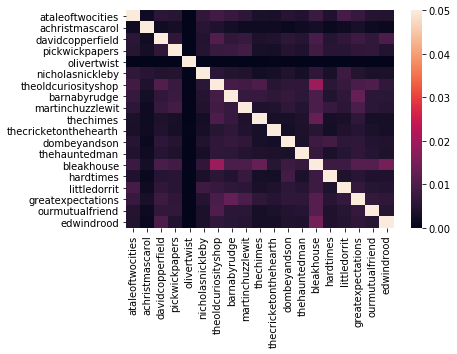

In [100]:
# Plot the similarity between the various texts as a heatmap
sns.heatmap(sim_df, annot=False, vmin=0, vmax=0.05)

This plot demonstrates that the various texts are relatively disimlar, with the texts most closely aligned being Bleak House and The Old Curiosity Shop.

The similarity of texts to A Tale of Two Cities may be focused upon by selecting the column of the similarity dataframe relevant to this text.

Text(0.5, 1.0, 'Similarity vs A Tale of Two Cities')

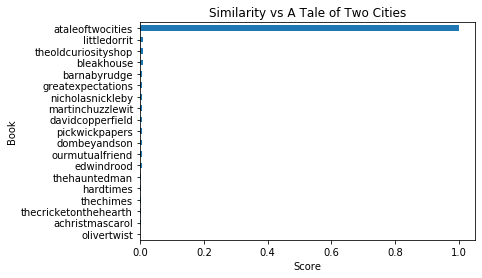

In [101]:
# Select the column corresponding to A Tale of Two Cities
v = sim_df['ataleoftwocities']

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot the data
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Add labels and plot title
plt.xlabel('Score')
plt.ylabel('Book')
plt.title('Similarity vs A Tale of Two Cities')

The graph may be replotted with limits on the Score, to more easily assess which books are most similar to A Tale of Two Cities.

(0, 0.01)

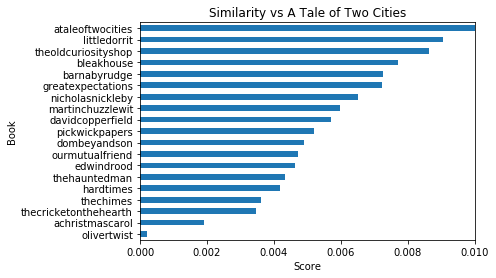

In [102]:
# Plot the data
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Add labels and plot title
plt.xlabel('Score')
plt.ylabel('Book')
plt.title('Similarity vs A Tale of Two Cities')
plt.xlim([0,0.01])

As shown by the above plot, Little Dorrit is 'most similar' to A Tale of Two Cities, with a cosine similarity between the two books of c. 0.009.

It may be interesting to check the most important words in Little Dorrit (as we did previously for A Tale of Two Cities).

In [103]:
# First we need to define the index for Little Dorrit
for i in range(len(titles)):
    # Store the index if the title is "littledorrit"
    if titles[i] == 'littledorrit':
        ld = i
        
        
# Convert the tfdf model for Little Dorrit into a DataFrame
df_tfidf_ld = pd.DataFrame(tfidf_model[bows[ld]])

# Define the column names
df_tfidf_ld.columns = ['id', 'score']

# Add the lemmatized words themselves as an extra column
df_tfidf_ld['lemma'] = [dictionary[i] for i in list(df_tfidf_ld['id'])]

# Print the first 10 rows of the DataFrame in descending order
df_tfidf_ld.sort_values(by='score', ascending=False).head(10)

,id,score,lemma
12299,28689,0.587565,dorrit
12176,28566,0.554500,clennam
12605,28995,0.245541,merdle
12687,29077,0.244457,pancks
12598,28988,0.210851,meagles
12392,28782,0.152311,flintwinch
12441,28831,0.144723,gowan
6885,8894,0.126565,arthur
12040,28430,0.126294,amy
12724,29114,0.099192,plornish


As a reminder the 10 most 'important' words in A Tale of Two Cities were as follows

In [104]:
df_tfidf_totc.sort_values(by='score', ascending=False).head(10)

,id,score,lemma
4629,4660,0.576988,lorry
1936,1947,0.472223,defarge
4714,4745,0.254875,manette
1084,1089,0.245493,carton
1860,1869,0.231421,darnay
4657,4688,0.201711,lucie
1785,1794,0.190766,cruncher
7462,7510,0.168874,stryver
7730,7779,0.143856,tellson
4947,4978,0.130315,monseigneur


The above two tables demonstrate that no word appears in the top ten most important words of both books (reflecting the relatively low score for similarity for even this book, which was found to be most similar to A Tale of Two Cities).

However, as the cosine similarity for A Tale of Two Cities was highest with Little Dorritt this is the recommended book to read for readers of A Tale of Two Cities.

# Conclusion
The project demonstrates the application of web-scraping and natural language processing to build a recommendation system.

Although the system recommended that readers of A Tale of Two Cities explore the book Little Dorrit, the similarity between the two books was not very high.

In terms of next steps, some potential interesting topics to explore would be:

- Automation of the sourcing of the texts: currently the URL and title of each of the relevant texts are manually input. It would be helpful to build into the system some form of crawling system which starts on the page for the author and loops through to output each of the relevant URLs for the texts, and the titles of these texts

- Comparison to other authors: As an extension, it would be interesting to see the similarity of the texts explored above to texts from other authors and topics.